<a href="https://colab.research.google.com/github/FarkhandaMalik/dip-lab2/blob/main/DIPLab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1 Part A**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


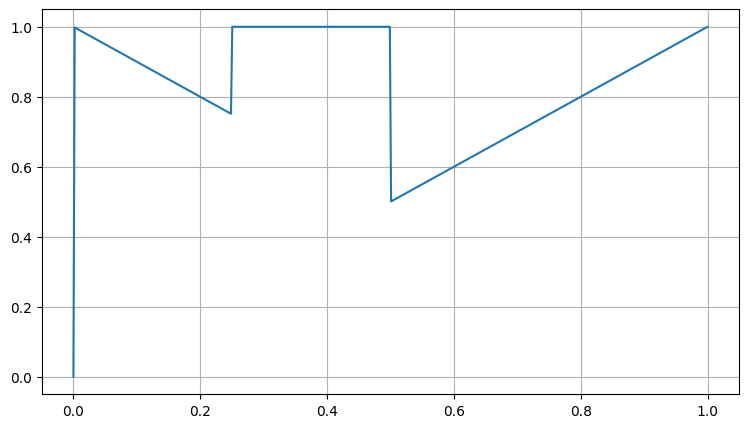

In [3]:

def piecewise(x):
 if 0 < x <= 0.25:
  return 1 - x
 elif 0.25 < x <= 0.5:
  return 1
 else:
  return x
sliced = np.linspace(0, 1, 500)
plt.figure(figsize=(9, 5))
plt.plot(sliced, [piecewise(x) for x in sliced])
plt.grid()
plt.show()

**Exercise 1 Part B**

In [4]:
import cv2
from matplotlib import pyplot as plt


(-0.5, 1535.5, 1023.5, -0.5)

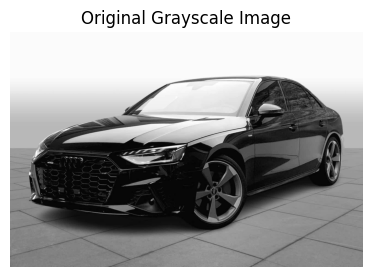

In [5]:
img = cv2.imread('a4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_low = 100
thresh_high = 200
thresh_img = cv2.inRange(gray, thresh_low, thresh_high)
result = cv2.bitwise_and(gray, gray, mask=thresh_img)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

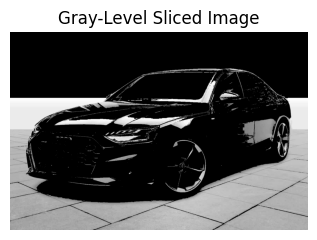

In [6]:
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Gray-Level Sliced Image')
plt.axis('off')
plt.tight_layout()
plt.show()

**Exercise 2**

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


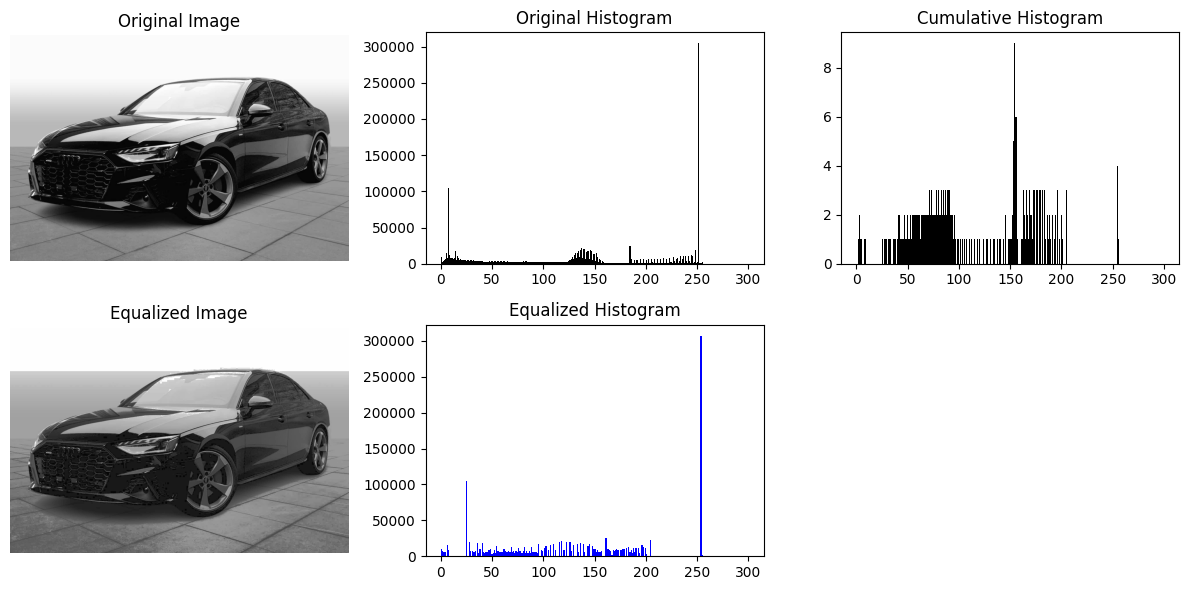

In [11]:


def myhist_equ(image):
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    r, c = image.shape
    h = np.zeros(256, dtype=int)

    for i in range(r):
        for j in range(c):
            h[image[i, j]] += 1

    cum_h = np.zeros(256, dtype=float)
    cum_h[0] = h[0]
    for k in range(1, 256):
        cum_h[k] = cum_h[k - 1] + h[k]

    cum_h = np.floor((cum_h / (r * c)) * 255).astype(np.uint8)
    out_image = np.zeros_like(image)

    for i in range(r):
        for j in range(c):
            out_image[i, j] = cum_h[image[i, j]]

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.hist(image.flatten(), bins=300, range=[0, 300], color='black')
    plt.title('Original Histogram')

    plt.subplot(2, 3, 3)
    plt.hist(cum_h, bins=300, range=[0, 300], color='black')
    plt.title('Cumulative Histogram')

    plt.subplot(2, 3, 4)
    plt.imshow(out_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.hist(out_image.flatten(), bins=256, range=[0, 300], color='blue')
    plt.title('Equalized Histogram')

    plt.tight_layout()
    plt.show()

image = cv2.imread('a4.jpg', cv2.IMREAD_GRAYSCALE)
myhist_equ(image)

**Exercise 3**

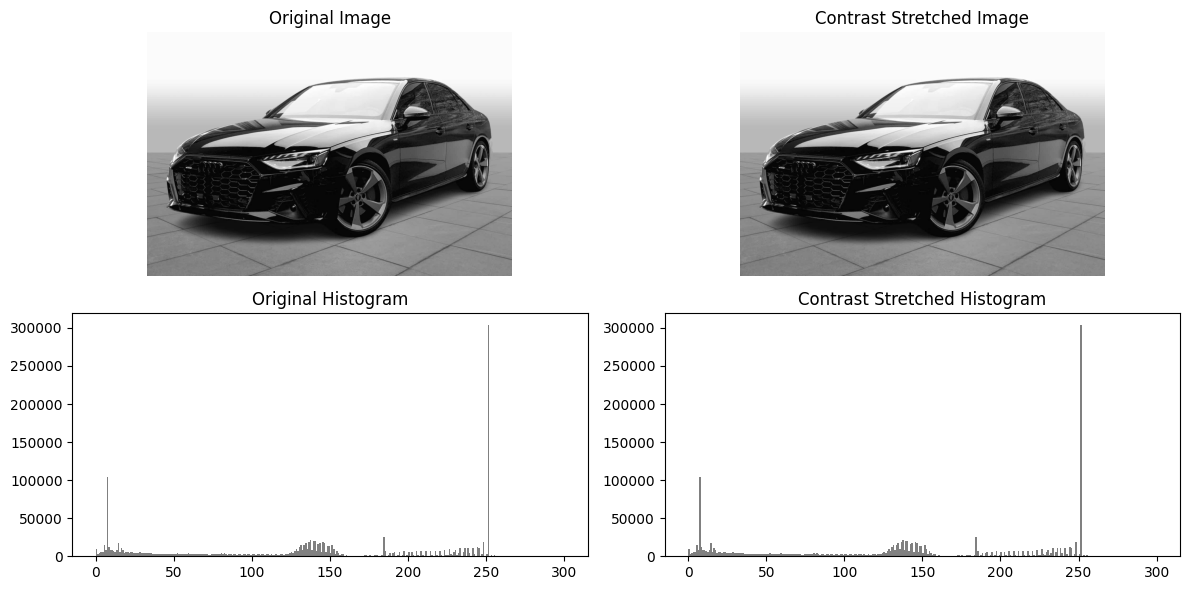

In [12]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

def contrastStretch(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    r_min = np.min(image)
    r_max = np.max(image)
    L = 256
    stretched_image = (image - r_min) * ((L - 1) / (r_max - r_min))
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(stretched_image, cmap='gray')
    plt.title('Contrast Stretched Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.hist(image.flatten(), bins=300, range=[0, 300], color='gray')
    plt.title('Original Histogram')

    plt.subplot(2, 2, 4)
    plt.hist(stretched_image.flatten(), bins=300, range=[0, 300], color='gray')
    plt.title('Contrast Stretched Histogram')

    plt.tight_layout()
    plt.show()

image = cv2.imread('a4.jpg', cv2.IMREAD_GRAYSCALE)
contrastStretch(image)